
## About this project

We want a csv with data about most sold products in amazon, because we want to check in another websites if this products are cheaper and we can re-sell in amazon. To do this, we need specific information like the product model,brand,price, merchants, how often is sold, etc.

I will scrap in a specific main category of products (I already know some other sites selling this products with cheaper prices :D ). 

Technologies used:
- Selenium
- BeautifulSoup (utils.py)
- Pandas

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from selenium import webdriver
import pandas as pd
import time
import random
from utils import (soup_content_from_url,
                    elements_from_soup_bestsellers_web, 
                    subcategories_from_bestsellers_web,
                    detail_dict_from_product_page,
                    load_obj,
                    save_obj)

In [3]:
driver = webdriver.Firefox()
soups = []

In [115]:
base_url = 'https://www.inmoclick.com.ar'
houses_list = "/inmuebles/venta/casas/mendoza"
params = "?favoritos=0&limit=48&prevEstadoMap=&provincias=21&precio%5Bmin%5D=&precio%5Bmax%5D=&moneda=1&sup_cubierta%5Bmin%5D=&sup_cubierta%5Bmax%5D=&sup_total%5Bmin%5D=&sup_total%5Bmax%5D=&page="
url = base_url+houses_list+(params+str(1))

soups.append(soup_content_from_url(driver, url))

In [116]:
from urllib.parse import urlparse
import random

def inmoclick_last_page(html_soup):
    last_page_url = urlparse(html_soup.find('span',attrs={'class':'last'}).a.get('href'))
    last_page_number = int(last_page_url.query.split('&page=')[1])
    return last_page_number

pages_range = range(2,inmoclick_last_page(soups[0]))
for p in pages_range:
    url = base_url+houses_list+(params + str(p))
    print(url)
    soups.append(soup_content_from_url(driver, url))
    time.sleep(random.randint(1,5))

https://www.inmoclick.com.ar/inmuebles/venta/casas/mendoza?favoritos=0&limit=48&prevEstadoMap=&provincias=21&precio%5Bmin%5D=&precio%5Bmax%5D=&moneda=1&sup_cubierta%5Bmin%5D=&sup_cubierta%5Bmax%5D=&sup_total%5Bmin%5D=&sup_total%5Bmax%5D=&page=2
https://www.inmoclick.com.ar/inmuebles/venta/casas/mendoza?favoritos=0&limit=48&prevEstadoMap=&provincias=21&precio%5Bmin%5D=&precio%5Bmax%5D=&moneda=1&sup_cubierta%5Bmin%5D=&sup_cubierta%5Bmax%5D=&sup_total%5Bmin%5D=&sup_total%5Bmax%5D=&page=3
https://www.inmoclick.com.ar/inmuebles/venta/casas/mendoza?favoritos=0&limit=48&prevEstadoMap=&provincias=21&precio%5Bmin%5D=&precio%5Bmax%5D=&moneda=1&sup_cubierta%5Bmin%5D=&sup_cubierta%5Bmax%5D=&sup_total%5Bmin%5D=&sup_total%5Bmax%5D=&page=4
https://www.inmoclick.com.ar/inmuebles/venta/casas/mendoza?favoritos=0&limit=48&prevEstadoMap=&provincias=21&precio%5Bmin%5D=&precio%5Bmax%5D=&moneda=1&sup_cubierta%5Bmin%5D=&sup_cubierta%5Bmax%5D=&sup_total%5Bmin%5D=&sup_total%5Bmax%5D=&page=5
https://www.inmoclic

https://www.inmoclick.com.ar/inmuebles/venta/casas/mendoza?favoritos=0&limit=48&prevEstadoMap=&provincias=21&precio%5Bmin%5D=&precio%5Bmax%5D=&moneda=1&sup_cubierta%5Bmin%5D=&sup_cubierta%5Bmax%5D=&sup_total%5Bmin%5D=&sup_total%5Bmax%5D=&page=36
https://www.inmoclick.com.ar/inmuebles/venta/casas/mendoza?favoritos=0&limit=48&prevEstadoMap=&provincias=21&precio%5Bmin%5D=&precio%5Bmax%5D=&moneda=1&sup_cubierta%5Bmin%5D=&sup_cubierta%5Bmax%5D=&sup_total%5Bmin%5D=&sup_total%5Bmax%5D=&page=37
https://www.inmoclick.com.ar/inmuebles/venta/casas/mendoza?favoritos=0&limit=48&prevEstadoMap=&provincias=21&precio%5Bmin%5D=&precio%5Bmax%5D=&moneda=1&sup_cubierta%5Bmin%5D=&sup_cubierta%5Bmax%5D=&sup_total%5Bmin%5D=&sup_total%5Bmax%5D=&page=38
https://www.inmoclick.com.ar/inmuebles/venta/casas/mendoza?favoritos=0&limit=48&prevEstadoMap=&provincias=21&precio%5Bmin%5D=&precio%5Bmax%5D=&moneda=1&sup_cubierta%5Bmin%5D=&sup_cubierta%5Bmax%5D=&sup_total%5Bmin%5D=&sup_total%5Bmax%5D=&page=39
https://www.inmo

In [117]:
articles = []
for s in soups:
    articles = articles + s.find('div',attrs={'class':'cont-articles'}).findAll('article')
len(articles)

3216

In [133]:
from datetime import datetime

class House:
    ref_id = None
    neighborhood = None
    district = None
    province = None
    currency = None
    amount = None
    price = None
    url = None
    description = None
    totalArea = None # Superficie total
    floorArea = None # superficie cubierta
    bedrooms = None
    bathrooms = None
    garage = None
    owner = None
    
    source_web = None
    recent_id = None
    scrapped_date = datetime.now()
    
    def __init__(self,house_dict):
        for k in house_dict.keys():
            setattr(self,k,house_dict[k])
        mandatory_attrs = ['source_web','recent_id','scrapped_date','url','totalArea','district']
        for a in mandatory_attrs:
            if not getattr(self,a):
                raise Exception(f'Error creating house: {a} is needed')
        
    def list_order():
        return ['ref_id',
                'neighborhood',
                'district',
                'province',
                'price',
                'currency',
                'amount',
                'url',
                'description',
                'totalArea',
                'floorArea',
                'bedrooms',
                'bathrooms',
                'garage',
                'owner',
                'source_web',
                'recent_id',
                'scrapped_date']
    
    def to_list(self):
        return [getattr(self, a) for a in House.list_order()]

In [150]:
import locale
# $ sudo locale-gen es_ES
# $ sudo locale-gen es_ES.UTF-8
locale.setlocale(locale.LC_ALL, 'es_ES.UTF-8')

def create_inmoclick_house_dict(html_article):
    house_dict = {}
    
    house_dict['ref_id'] = html_article.a.get("name")
    
    # Property data
    house_dict['neighborhood'] = html_article.find('p',attrs={'itemprop':'streetAddress'}).text
    house_dict['district'] = html_article.find('span',attrs={'itemprop':'addressLocality'}).text
    house_dict['province'] = html_article.find('span',attrs={'itemprop':'addressRegion'}).text
        
    house_dict['price'] = html_article.get("precio")
    if not 'consultar' in house_dict['price'].lower():
        house_dict['currency'] = house_dict['price'].strip().split(' ')[0]
        house_dict['amount'] = locale.atof(house_dict['price'].strip().split(' ')[1])
    
    relative_url = (html_article.find('div', attrs={'class':'description-hover'})
            .a.next_sibling.get('href'))
    house_dict['url'] = base_url+relative_url
    
    house_dict['description'] = (html_article
                                 .find('div', attrs={'class':'description-hover'})
                                 .p.text)
    
    house_dict['totalArea'] = html_article.get("sup_t")
        
    house_dict['floorArea'] = html_article.get("sup_c")
    
    # Property tags
    house_dict['bedrooms'] = html_article.find('span',attrs={'class':'label-dormitorio'}).text
    house_dict['bathrooms'] = html_article.find('span',attrs={'class':'label-banio'}).text
    #house_dict['garage'] = html_article.find('span',attrs={'class':'label-banio'}).text
    
    # Property brand
    owner_div = html_article.find('div',attrs={'class':'property-brand'})
    if owner_div.img:
        house_dict['owner'] = owner_div.img.get('title')
    else:
        house_dict['owner'] = owner_div.p.text

    # Cleaning white spaces
    for k in house_dict.keys():
        if isinstance(house_dict[k], str):
            house_dict[k] = house_dict[k].strip()
            
    return house_dict

In [151]:
houses = []
data = []
for i,a in enumerate(articles):
    house_dict = create_inmoclick_house_dict(a)
    house_dict['recent_id'] = i+1
    house_dict['source_web'] = 'inmoclick'
    h = House(house_dict)
    houses.append(h)
    data.append(h.to_list())
len(data)

3216

In [152]:
df = pd.DataFrame(data,columns=House.list_order())
df.head(10)

,ref_id,neighborhood,district,province,price,currency,amount,url,description,totalArea,floorArea,bedrooms,bathrooms,garage,owner,source_web,recent_id,scrapped_date
0,inmueble-26421-1,viamonte 2901,Chacras de Coria,Mendoza,$ 21.000.000,$,21000000.0,https://www.inmoclick.com.ar/26421-jorge-scagl...,se vende casa a estrenar AGOSTO 2020 en zona d...,750,320,5,3,None,Dueño Directo,inmoclick,1,2020-05-19 18:50:41.713835
1,inmueble-5870-17,Barrio Alto Terrada,Carrodilla,Mendoza,US$ 178.000,US$,178000.0,https://www.inmoclick.com.ar/5870-hernan-gabri...,Casa a estrenar en Barrio privado Alto Terrada...,350,200,3,3,None,Dueño Directo,inmoclick,2,2020-05-19 18:50:41.713835
2,inmueble-11248-2608,RINCON DE DRUMOND,Lujan de Cuyo,Mendoza,US$ 125.000,US$,125000.0,https://www.inmoclick.com.ar/11248-openhouse-n...,OPENHOUSE OPORTUNIDAD UNICA !!! CASA EN VENTA ...,300,140,3,3,None,OPENHOUSE Negocios Inmobiliarios,inmoclick,3,2020-05-19 18:50:41.713835
3,inmueble-4586-84,Rincón de Drummond,Lujan de Cuyo,Mendoza,$ 19.500.000,$,19500000.0,https://www.inmoclick.com.ar/4586-catania/inmu...,?-Catania Vende- Hermosa casa en barrio privad...,300,123,2,2,None,Catania,inmoclick,4,2020-05-19 18:50:41.713835
4,inmueble-9391-271,BARRIO PINAR DEL SOL - DPTO. MAIPÚ - MENDOZA,Maipu,Mendoza,US$ 150.000,US$,150000.0,https://www.inmoclick.com.ar/9391-rd-inmobilia...,OPORTUNIDAD VENDO EXCELENTE CASA - BARRIO PINA...,525,180,3,2,None,RD INMOBILIARIA,inmoclick,5,2020-05-19 18:50:41.713835
5,inmueble-28725-3,Adyacencia Azcuenaga. Villa Nueva,Guaymallen,Mendoza,US$ 93.000,US$,93000.0,https://www.inmoclick.com.ar/28725-virginia-si...,"Particular ,casa excelente estado ,amplia y mu...",214,110,3,1,None,Dueño Directo,inmoclick,6,2020-05-19 18:50:41.713835
6,inmueble-12387-2,ZONA CALLE MARTINEZ Y RUTA 50,San Martin,Mendoza,US$ 250.000,US$,250000.0,https://www.inmoclick.com.ar/12387-rodriguez-p...,VENDO EXCLUSIVA CASA en callejón privado. 2000...,2500,372,3,3,None,Dueño Directo,inmoclick,7,2020-05-19 18:50:41.713835
7,inmueble-64518-4,Lago Argentino 1832-Barrio Sol Trapiche,Godoy Cruz,Mendoza,US$ 237.000,US$,237000.0,https://www.inmoclick.com.ar/64518-cecilia-pob...,"Casa de dos pisos ubicada en Barrio Privado, t...",300,150,3,2,None,Dueño Directo,inmoclick,8,2020-05-19 18:50:41.713835
8,inmueble-11248-3170,BARRIO VALLE ESCONDIDO,Mayor Drummond,Mendoza,US$ 95.000,US$,95000.0,https://www.inmoclick.com.ar/11248-openhouse-n...,OPENHOUSE inmobiliaria Vende CASA EN BARRIO PR...,550,130,2,2,None,OPENHOUSE Negocios Inmobiliarios,inmoclick,9,2020-05-19 18:50:41.713835
9,inmueble-54551-2,LAPRIDA CASI TABANERA,Capital,Mendoza,US$ 54.600,US$,54600.0,https://www.inmoclick.com.ar/54551-augusto/inm...,Propietario vende hermosa casa esquina a remod...,126,90,2,1,None,Dueño Directo,inmoclick,10,2020-05-19 18:50:41.713835


In [144]:
len(df)

3216

In [179]:
df.to_csv('out.csv')

# EDA

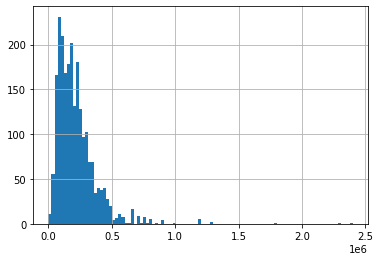

In [158]:
df[df.currency=='US$'].amount.hist(bins=100)

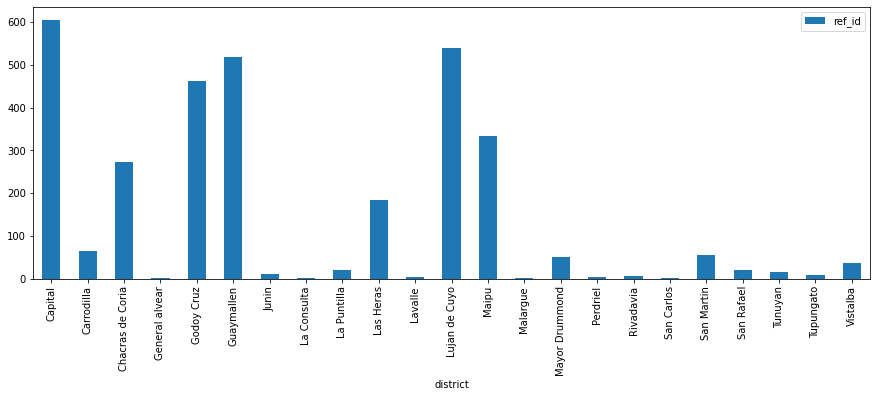

In [177]:
df.groupby('district').count().plot.bar(y='ref_id',figsize=(15,5))

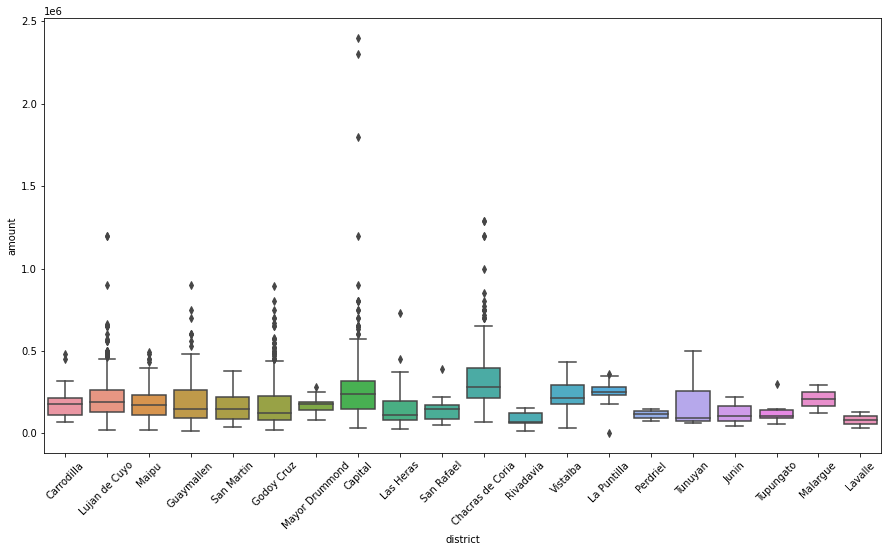

In [17]:
import seaborn as sns
from matplotlib import pyplot as plt

df = pd.read_csv('out.csv')
plt.figure(figsize=(15,8))
g = sns.boxplot(x=df[df.currency=='US$']['district'], y=df['amount'])
g.set_xticklabels(g.get_xticklabels(),rotation=45)
plt.show()

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
2281    228.0
2282    228.0
2283    228.0
2284    228.0
2285    228.0
Length: 2286, dtype: float64

In [58]:
dfdol = df[df.currency=='US$'].reset_index(drop=True)
dfdol['r_20'] = round(dfdol.index.to_series()/20)
h = dfdol.groupby('r_20').mean()
#pd.pivot_table(h,values,index='r_10',columns,aggfunc)

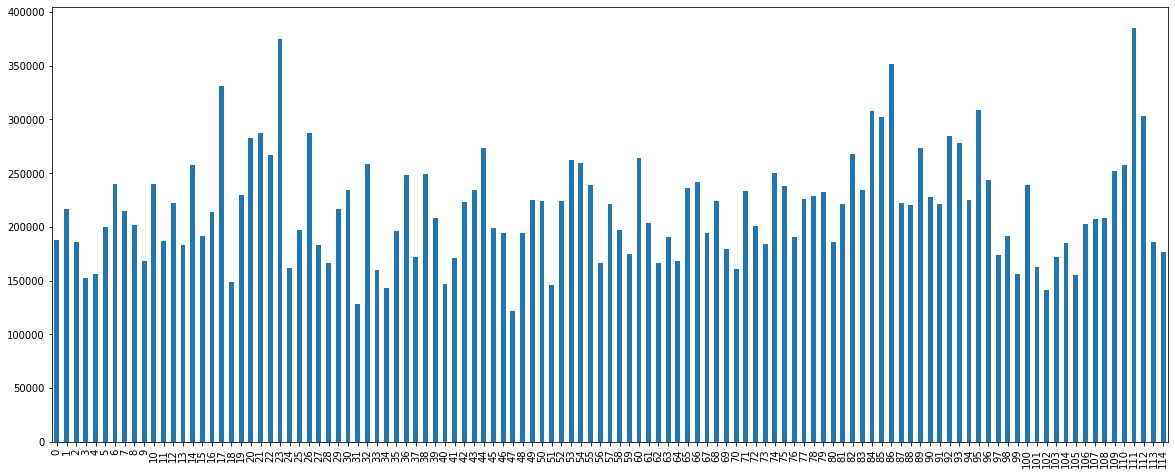

In [59]:
plt.figure(figsize=(20,8))
h.index = h.index.astype(int)
h['amount'].plot.bar()

In [68]:
import numpy as np
pd.set_option('display.max_columns', 30)
list(dfdol[dfdol['r_20']==3].url)

['https://www.inmoclick.com.ar/71779-greenwood/inmuebles/82/ficha/casa-en-venta-en-acceso-este-y-arturo-gonzalez?btid=2465480',
 'https://www.inmoclick.com.ar/71779-greenwood/inmuebles/84/ficha/casa-en-venta-en-juan-agustin-maza-y-azcuenaga?btid=2465480',
 'https://www.inmoclick.com.ar/17636-gold-group-argentina/inmuebles/1479/ficha/casa-en-venta-en-b0-privado-bucci-bandera-de-los-andes-y-rosario?btid=2465480',
 'https://www.inmoclick.com.ar/17636-gold-group-argentina/inmuebles/1500/ficha/casa-en-venta-en-laguna-horcones-1054-barrio-fuchs?btid=2465480',
 'https://www.inmoclick.com.ar/17636-gold-group-argentina/inmuebles/1508/ficha/casa-en-venta-en-vicente-gil-539?btid=2465480',
 'https://www.inmoclick.com.ar/17636-gold-group-argentina/inmuebles/1515/ficha/casa-en-venta-en-rufino-ortega-y-martinez-de-rozas?btid=2465480',
 'https://www.inmoclick.com.ar/17636-gold-group-argentina/inmuebles/1518/ficha/casa-en-venta-en-p-benegas-691?btid=2465480',
 'https://www.inmoclick.com.ar/17636-gold-g

In [69]:
dfdol[dfdol['r_20']==3]

,Unnamed: 0,ref_id,neighborhood,district,province,price,currency,amount,url,description,totalArea,floorArea,bedrooms,bathrooms,garage,owner,source_web,recent_id,scrapped_date,r_10,r_30,r_20
51,73,inmueble-71779-82,ACCESO ESTE Y ARTURO GONZALEZ,Guaymallen,Mendoza,US$ 370.000,US$,370000.0,https://www.inmoclick.com.ar/71779-greenwood/i...,"GREENWOOD VENDE GRAN PROPIEDAD, ALTA GAMA, DET...",530,440,3,4,NaN,Greenwood,inmoclick,74,2020-05-19 18:50:41.713835,7.0,2.0,3.0
52,74,inmueble-71779-84,Juan Agustín Maza y Azcuenaga,Maipu,Mendoza,US$ 170.000,US$,170000.0,https://www.inmoclick.com.ar/71779-greenwood/i...,GREENWOOD VENDE CASA MODERNA Y EN UN ENTORNO U...,1000,200,4,2,NaN,Greenwood,inmoclick,75,2020-05-19 18:50:41.713835,8.0,2.0,3.0
53,75,inmueble-17636-1479,B° Privado Bucci / Bandera de los Andes y Rosario,Guaymallen,Mendoza,US$ 170.000,US$,170000.0,https://www.inmoclick.com.ar/17636-gold-group-...,Gold Group Argentina® Vende!!\nConfortable cas...,460,220,4,2,NaN,Gold Group Argentina®,inmoclick,76,2020-05-19 18:50:41.713835,8.0,3.0,3.0
54,76,inmueble-17636-1500,"Laguna Horcones 1054, Barrio Fuchs",Godoy Cruz,Mendoza,US$ 89.000,US$,89000.0,https://www.inmoclick.com.ar/17636-gold-group-...,Gold Group Argentina® Vende!!\nOportunidad!!\n...,159,130,3,2,NaN,Gold Group Argentina®,inmoclick,77,2020-05-19 18:50:41.713835,8.0,3.0,3.0
55,77,inmueble-17636-1508,Vicente Gil 539,Capital,Mendoza,US$ 250.000,US$,250000.0,https://www.inmoclick.com.ar/17636-gold-group-...,Gold Group Argentina® vende!!\nMagnífica casa ...,469,490,5,6,NaN,Gold Group Argentina®,inmoclick,78,2020-05-19 18:50:41.713835,8.0,3.0,3.0
56,78,inmueble-17636-1515,Rufino Ortega y Martínez de Rozas,Capital,Mendoza,US$ 195.000,US$,195000.0,https://www.inmoclick.com.ar/17636-gold-group-...,Gold Group Argentina® vende!!\nEspléndida casa...,200,200,4,3,NaN,Gold Group Argentina®,inmoclick,79,2020-05-19 18:50:41.713835,8.0,3.0,3.0
57,79,inmueble-17636-1518,P. Benegas 691,Godoy Cruz,Mendoza,US$ 130.000,US$,130000.0,https://www.inmoclick.com.ar/17636-gold-group-...,Gold Group Argentina® Vende!!\nFuncional y din...,330,260,3,3,NaN,Gold Group Argentina®,inmoclick,80,2020-05-19 18:50:41.713835,8.0,3.0,3.0
58,83,inmueble-17636-1535,25 de Mayo 1668,Capital,Mendoza,US$ 140.000,US$,140000.0,https://www.inmoclick.com.ar/17636-gold-group-...,Gold Group Argentina® vende!!\nGran propiedad ...,220,330,10 o Mas,10 o Mas,NaN,Gold Group Argentina®,inmoclick,84,2020-05-19 18:50:41.713835,8.0,3.0,3.0
59,85,inmueble-17636-1548,Santo Tomás 2244,Godoy Cruz,Mendoza,US$ 78.000,US$,78000.0,https://www.inmoclick.com.ar/17636-gold-group-...,Gold Group Argentina® vende!!\nMagnífica casa ...,305,204,4,3,NaN,Gold Group Argentina®,inmoclick,86,2020-05-19 18:50:41.713835,9.0,3.0,3.0
60,86,inmueble-17636-1550,"Tierra del Fuego 8321, B° EPA",Carrodilla,Mendoza,US$ 68.000,US$,68000.0,https://www.inmoclick.com.ar/17636-gold-group-...,"Gold Group Argentina® Vende!!\nPráctica, compa...",120,80,3,1,NaN,Gold Group Argentina®,inmoclick,87,2020-05-19 18:50:41.713835,9.0,3.0,3.0
